## Installing the necessary packages

In [1]:
!pip install diplib
!pip install numpy

   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/5.1 MB 1.1 MB/s eta 0:00:05
   ------- -------------------------------- 1.0/5.1 MB 10.2 MB/s eta 0:00:01
   ---------------- ----------------------- 2.1/5.1 MB 19.1 MB/s eta 0:00:01
   ---------------- ----------------------- 2.1/5.1 MB 19.1 MB/s eta 0:00:01
   ---------------- ----------------------- 2.1/5.1 MB 19.1 MB/s eta 0:00:01
   ---------------- ----------------------- 2.1/5.1 MB 19.1 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 10.6 MB/s eta 0:00:01
   ------------------------ --------------- 3.1/5.1 MB 10.6 MB/s eta 0:00:01
   -------------------------------- ------- 4.2/5.1 MB 10.7 MB/s eta 0:00:01
   -------------------------------- ------- 4.2/5.1 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 5.1/5.1 MB 10.2 MB/s eta 0:00:00


## Make a path to your files
Make sure you have a folder on your computer named "IAAM_Images" and that you have the images saved inside that folder.
after ```home_dir``` you put the location of the folder in which you put your IAAM_Images. 

In [1]:
%matplotlib inline
import diplib as dip
import numpy as np
import os
import matplotlib as pp 
# Define the path to the home_dir folder on the C or D drive ()
home_dir = ".\\"  # Use double backslashes to escape the backslash

# Construct the full path to the folder "IAAM Images" within the home_dir folder
iaam_images_path = os.path.join(home_dir, "IAAM_Images")


print ( iaam_images_path)
# Check if the code can find the file (check the file)
if os.path.exists(home_dir):
    print("The path exists and can be found.")
else:
    print("The path does not exist or cannot be found.")


DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org
.\IAAM_Images
The path exists and can be found.


## Read the image

In [18]:
# Specify the file name (for other images put other filenames here.)
file_name = "rect1b.tif"
A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

## Show the image 
A pop-up window will open

In [23]:
dip.viewer.Show(A)

In [21]:
def plot_histogram(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    hist= dip.Histogram(A)
    hist.Show()

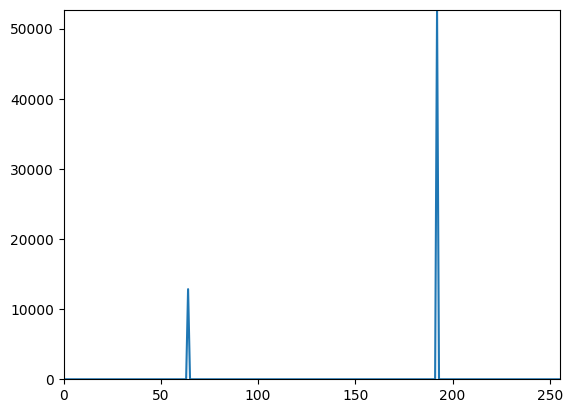

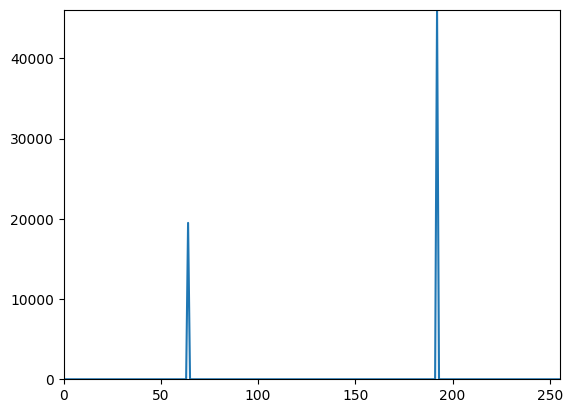

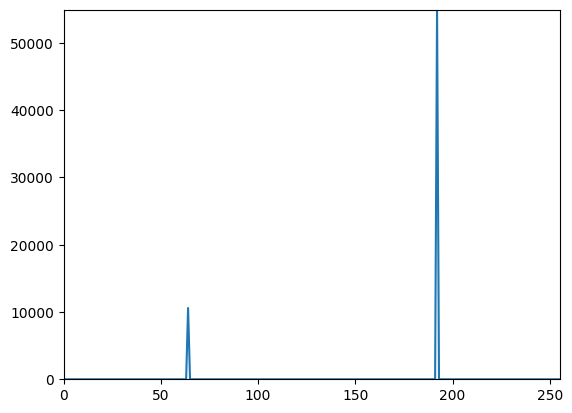

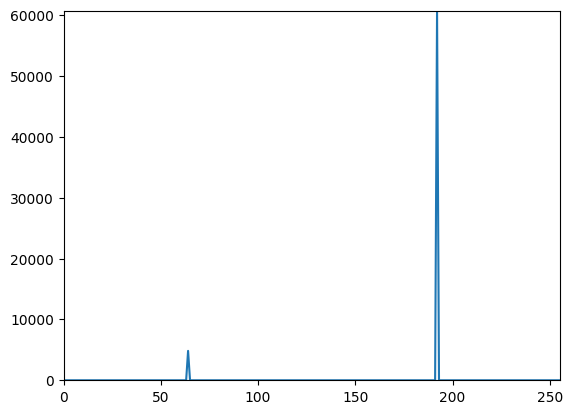

In [24]:
file_names = ["rect1a.tif", "rect2a.tif", "rect3a.tif", "rect4a.tif"]

for file_name in file_names:
    plot_histogram(file_name)
    

In [56]:
file_name = "rect2a.tif"
A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))

In [78]:
threshold = dip.IsodataThreshold(A)
binary_image = A < 70
print(threshold)

2D Scalar image:
    data type:      BIN
    sizes:          {256, 256}
    strides:        {1, 256}, tensor stride 1
    data pointer:   000001C95BB56730 (shared among 1 images)
    origin pointer: 000001C95BB56730



In [79]:
labeled_image = dip.Label(binary_image, connectivity=1)


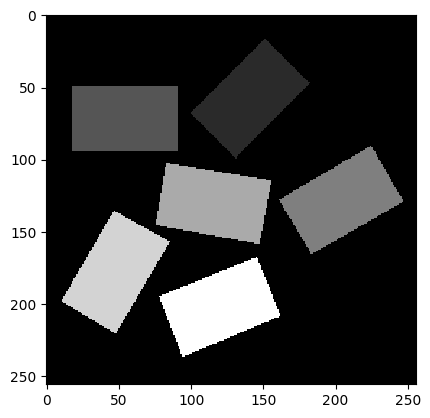

In [80]:
labeled_image.Show()
# dip.viewer.Show(labeled_image)

In [66]:
measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
for i in sizes:
    print (i)

[3195.]
[3285.]
[3265.]
[3248.]
[3230.]
[3262.]


In [81]:
sizes

array([[3195.],
       [3285.],
       [3265.],
       [3248.],
       [3230.],
       [3262.]])

In [63]:
average_size = np.mean(size)
average_size

65484.0

## 2.1.2

In [86]:
def compute_size(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    binary_image = A < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Size'])
    sizes = np.array([measurements['Size'][obj] for obj in measurements.Objects()])
    return sizes
    

In [88]:
all_sizes = []

for file_name in file_names:
    sizes = compute_size(file_name)
    all_sizes.extend(sizes)
all_sizes_arr = np.array(all_sizes)

In [112]:
print(np.mean(all_sizes_arr))
print(np.std(all_sizes_arr))

1910.24
2477.835963577896


## 2.1.3

In [101]:
def compute_perimeter(file_name):
    A = dip.ImageReadTIFF(os.path.join(iaam_images_path, file_name))
    binary_image = A < 70
    labeled_image = dip.Label(binary_image, connectivity=1)
    measurements = dip.MeasurementTool.Measure(labeled_image, A, ['Perimeter'])
    sizes = np.array([measurements['Perimeter'][obj] for obj in measurements.Objects()])
    return sizes

In [113]:
all_perims = []

for file_name in file_names:
    sizes_p = compute_perimeter(file_name)
    all_perims.extend(sizes_p)
all_perims_arr = np.array(all_perims)

In [114]:
all_perims_arr

array([[457.49759265],
       [233.73359265],
       [230.13759265],
       [234.67559265],
       [235.97759265],
       [233.26959265],
       [235.06959265],
       [143.89759265],
       [148.76959265],
       [148.86159265],
       [146.93359265],
       [147.00959265],
       [147.54159265],
       [147.16159265],
       [150.47359265],
       [ 92.43359265],
       [ 90.97759265],
       [ 90.97759265],
       [ 92.92159265],
       [ 93.35359265],
       [ 92.04559265],
       [ 92.66959265],
       [ 93.54359265],
       [ 94.07559265],
       [ 95.22959265]])

In [115]:
print(np.mean(all_perims_arr))
print(np.std(all_perims_arr))


158.7695126535898
81.87284860900834
